In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS

from tqdm import trange
import seaborn as sns
from scipy import stats
import statsmodels.api as sm


# "請讀別的日期的檔，確認結果一致"

In [281]:
df = pd.read_csv("C:/Users/user/Desktop/2603.csv")

In [282]:
df = df[df["ask_1"]!=0]
df = df.dropna()

In [283]:
df["spread"] = df["ask_1"] - df["bid_1"]
df["total_qty"] = df["ask_qty1"] + df["bid_qty1"]
df["flow_imbalance"] = df["bid_qty1"] - df["ask_qty1"]
df["weighted_qty"] = df["total_qty"]*(np.log(df["spread"]+1))
df["mid_1"] = df["bid_1"]+ (df["ask_1"] - df["bid_1"])/2
df["mid_pct"] = df["mid_1"].pct_change(1)
df["theo"] = ((((df["bid_qty1"]/df["total_qty"])*df["bid_1"]+(df["ask_qty1"]/df["total_qty"])*df["ask_1"])-df["bid_1"])/df["spread"])+df["bid_1"]
df["theo_pct"] = df["theo"].pct_change(1)
df = df.dropna()

In [284]:
df = df.reset_index()

In [285]:
df

,level_0,index,zdate,stk_id7,stk_time,deal_or_not,deal_price,deal_qty,bid_1,bid_qty1,...,ask_5,ask_qty5,spread,total_qty,flow_imbalance,weighted_qty,mid_1,mid_pct,theo,theo_pct
0,1,2,2021/3/26,2603,44281.37501,0,0.00,0,42.00,197,...,42.25,226,0.05,469,-75,22.882587,42.025,0.000000,42.579957,0.000000
1,2,3,2021/3/26,2603,44281.37501,0,0.00,0,42.00,197,...,42.25,226,0.05,469,-75,22.882587,42.025,0.000000,42.579957,0.000000
2,3,4,2021/3/26,2603,44281.37501,0,0.00,0,42.00,197,...,42.25,226,0.05,469,-75,22.882587,42.025,0.000000,42.579957,0.000000
3,4,5,2021/3/26,2603,44281.37501,0,0.00,0,42.00,198,...,42.25,226,0.05,470,-74,22.931377,42.025,0.000000,42.578723,-0.000029
4,5,6,2021/3/26,2603,44281.37501,0,0.00,0,42.00,198,...,42.25,226,0.05,470,-74,22.931377,42.025,0.000000,42.578723,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81388,81604,81605,2021/3/26,2603,44281.56229,1,43.25,7304,43.20,335,...,43.45,1037,0.05,423,247,20.638239,43.225,0.000000,43.408038,-0.001093
81389,81605,81606,2021/3/26,2603,44281.56235,1,43.10,5700,43.10,363,...,43.35,764,0.05,961,-235,46.887348,43.125,-0.002313,43.722268,0.007239
81390,81606,81607,2021/3/26,2603,44281.56241,1,43.05,5515,43.05,1831,...,43.30,536,0.05,2021,1641,98.604922,43.075,-0.001159,43.144013,-0.013226
81391,81607,81608,2021/3/26,2603,44281.56247,1,43.05,5517,43.05,2496,...,43.30,536,0.05,2687,2305,131.099171,43.075,0.000000,43.121083,-0.000531


In [424]:
df["continuous"] = np.sign(df["mid_pct"])/(df["spread"]*20)

### 試試看 12/2 12/1 10/2 10/1 7/1 5/1 

In [496]:
window = 12
tick_num =6
window2 = 12
tick_num2 =6

In [497]:
df["action"] = df["ask_1"] * 0

index = df["continuous"][df["continuous"]!=0].index
for i in trange(window,len(df["continuous"][df["continuous"]!=0])-1):
    if df["continuous"].iloc[index[(i-window):i]].sum()> tick_num and df["action"].iloc[index[:i]].sum()>-1:
        df["action"].iloc[index[i]] = -1
    elif df["continuous"].iloc[index[(i-window2):i]].sum()<-tick_num2 and df["action"].iloc[index[:i]].sum()<1:
        df["action"].iloc[index[i]] = 1
    else:
        df["action"].iloc[index[i]] = 0

100%|████████████████████████████████████████████████████████████████████████████| 1997/1997 [00:01<00:00, 1533.65it/s]


In [498]:
df[df["action"]!=0]

,level_0,index,zdate,stk_id7,stk_time,deal_or_not,deal_price,deal_qty,bid_1,bid_qty1,...,mid_1,mid_pct,theo,theo_pct,continuous,action,position,return,fee,return2
9779,9869,9870,2021/3/26,2603,44281.38270,1,42.60,5,42.55,188,...,42.600,0.000587,43.191905,0.014468,0.5,-1.0,0.0,0.000000,0.0000,1.000000
18120,18244,18245,2021/3/26,2603,44281.39418,1,41.90,43,41.90,441,...,41.950,-0.000596,42.328756,-0.011082,-0.5,1.0,0.0,-0.000000,0.0000,1.000000
18178,18303,18304,2021/3/26,2603,44281.39423,1,41.95,28,41.90,374,...,41.950,0.000596,42.379833,0.009773,0.5,1.0,1.0,0.000596,0.0015,1.000596
32674,32819,32820,2021/3/26,2603,44281.44942,1,42.45,17,42.45,33,...,42.475,0.001179,43.429915,0.022805,1.0,-1.0,1.0,0.001179,0.0000,1.013119
32767,32912,32913,2021/3/26,2603,44281.44958,0,0.00,0,42.40,232,...,42.450,-0.000589,43.273016,-0.004059,-0.5,-1.0,1.0,-0.000589,0.0000,1.012522
81116,81327,81328,2021/3/26,2603,44281.55872,1,43.25,2,43.15,288,...,43.200,0.000579,43.220968,0.001564,0.5,1.0,-1.0,-0.000579,0.0000,1.011000
81342,81558,81559,2021/3/26,2603,44281.55961,1,42.75,3907,42.75,145,...,42.775,-0.001168,42.865854,-0.004509,-1.0,1.0,0.0,-0.000000,0.0015,1.019818
81376,81592,81593,2021/3/26,2603,44281.56160,1,43.15,6147,43.15,320,...,43.175,-0.001157,43.658449,-0.011738,-1.0,-1.0,0.0,-0.000000,0.0015,1.030546
81378,81594,81595,2021/3/26,2603,44281.56171,1,43.25,6548,43.20,264,...,43.225,0.001158,43.510705,-0.000631,1.0,-1.0,-1.0,-0.001158,0.0015,1.029353


In [499]:
df["position"] = df["action"].cumsum()
df["return"] = df["position"]*df["mid_pct"]
df["fee"] = df["return"]*0
for i in trange(0,len(df["action"])):
    if df["action"].iloc[i]<0:
        df["fee"] = (np.abs(df["action"]))*0.0015


df["return2"] = (df["return"]+1).cumprod()

100%|████████████████████████████████████████████████████████████████████████| 81393/81393 [00:00<00:00, 109689.05it/s]


In [492]:
(df["action"])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
81388    0.0
81389    0.0
81390    0.0
81391    0.0
81392    0.0
Name: action, Length: 81393, dtype: float64

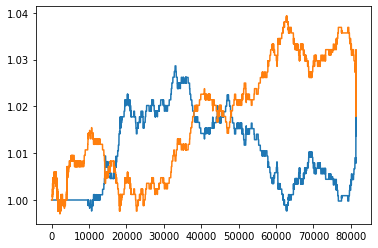

In [500]:
plt.plot(df["return2"])
plt.plot((df["mid_pct"]+1).cumprod())
